There are following report parameters available: ['Type', 'Size', 'Material', 'Alcohol', 'Country']
Please enter a parameter you want your report be based on: Alcohol


<ipython-input-2-937470a2b10a>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


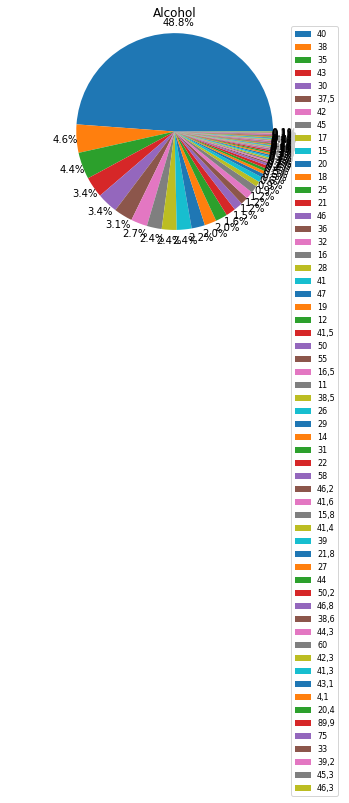

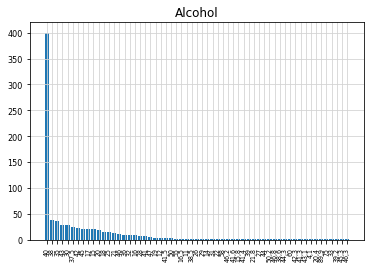

In [2]:
# Gala darbs "Kolekcijas DB atskaites programma" - V.Staņislavskis
import pandas as pd
import matplotlib.pyplot as plt
import webbrowser as wb

# Open .csv from Google Drive
db = pd.read_csv('https://drive.google.com/uc?export=view&id=1bGg1j9yq28lUKxfi0N2PiyWxQXbrQmE6', delimiter=',')

# Get column names and hide unneeded ones
report_parameters = list(db.keys())[2:-1]
print(f'There are following report parameters available: {report_parameters}')
item = input(str('Please enter a parameter you want your report be based on: ')).capitalize()

# Check user entered data
if item not in report_parameters:
    print('Incorrect parameter!')
else:

# Delete index column created by pandas
    db_no_index = db[item].to_string(index=False).split()
    db_types = list(dict.fromkeys(db_no_index))

# Get data for charts
    type_count = db[item].value_counts().to_dict()
    types = type_count.keys()
    values = type_count.values()

# Create and save pie chart
    plt.pie(values, autopct='%1.1f%%', pctdistance=1.11)
    plt.legend(types, loc='best', fontsize=8)
    plt.title(item)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig('pie.png', transparent=True)
    plt.show() # Without plt.show here, next chart will be broken

# Create and save bar chart
    plt.bar(types, values)
    plt.title(item)
    plt.grid(color='lightgray')
    plt.yticks(fontsize=8)
    plt.xticks(rotation=90, fontsize=6.3)
    plt.savefig('bar.png', transparent=True)

# Generate HTML file and open it in browser
    with open('report.html', 'w', encoding='utf-8') as report:
        temp_html = f""""<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
        <head><title>Alccollection report</title></head>
        <body>
        <center><h1>Alccollection report</h1>
        <p>Collection contains {len(db.index)-3} mini bottles from all over the world.</p></center>
       <table border="0"><tr><th>
        <P><b>Random 4 bottles:</b></br><a href="http://alccollection.ru" target=blank>Full collection can be found here</a>
        </br> {db.sample(4).to_html(index=False, justify='center', columns=list(db.keys())[1:])}</p>
        </th><th><center>
        <img src="pie.png" border=0></br>
        <img src="bar.png" border=0>
        </center></th></tr></table>
        </body></html>
        """
# There was need in converting Google Drive image link to use it in a HTML file
        html_gdrive_foto = temp_html.replace('<td>https://drive.google.com/file/d/', '<td><img src="https://drive.google.com/uc?export=view&id=')
        html_edit_table = html_gdrive_foto.replace('/view?usp=drive_web', '" width="300">')
# Small table styling
        html = html_edit_table.replace('<tbody>', '<tbody align=center>')
# Saving final HTML file
        report.write(html)
# Open newly created HTML in browser
        wb.open_new_tab('report.html')

